In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_dir = "cifar-10-img/train"
test_dir = "cifar-10-img/test"

image_data_generator = ImageDataGenerator(rescale=1.0/255)
train_batch_size = 5000
test_batch_size = 1000

train_generator = image_data_generator.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

test_generator = image_data_generator.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [5]:
# Load VGG16 without top layers
weights_path = "./vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

ValueError: The `weights` argument should be either `None` (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.  Received: weights=./vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5

In [6]:
for layer in base_model.layers:
   layer.trainable = False

NameError: name 'base_model' is not defined

In [30]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 66s 795ms/step - accuracy: 0.2226 - loss: 2.1457 - val_accuracy: 0.4090 - val_loss: 1.6241
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 711ms/step - accuracy: 0.4098 - loss: 1.6112 - val_accuracy: 0.4740 - val_loss: 1.4448
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 683ms/step - accuracy: 0.4658 - loss: 1.5027 - val_accuracy: 0.5160 - val_loss: 1.3576
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 683ms/step - accuracy: 0.5281 - loss: 1.3454 - val_accuracy: 0.5170 - val_loss: 1.3329
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 778ms/step - accuracy: 0.5320 - loss: 1.3037 - val_accuracy: 0.5220 - val_loss: 1.2830
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 56s 704ms/step - accuracy: 0.5609 - loss: 1.2159 - val_accuracy: 0.5400 - val_loss: 1.3019
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 70s 883ms/step - accuracy: 0.5635 - loss: 1.2021 - val_accuracy: 0.5290 - val_loss: 1.2778
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 772ms/step - accuracy: 0.5979 - loss: 1.1450 - val_accu

In [46]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True

In [32]:
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.2176 - loss: 2.1002 - val_accuracy: 0.4850 - val_loss: 1.4182
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4921 - loss: 1.3615 - val_accuracy: 0.5460 - val_loss: 1.2815
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6140 - loss: 1.1054 - val_accuracy: 0.5940 - val_loss: 1.1327
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.6686 - loss: 0.9621 - val_accuracy: 0.6170 - val_loss: 1.1588
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7247 - loss: 0.7867 - val_accuracy: 0.6210 - val_loss: 1.2368
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.7736 - loss: 0.6838 - val_accuracy: 0.6220 - val_loss: 1.2089
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7786 - loss: 0.6200 - val_accuracy: 0.6150 - val_loss: 1.2936
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8297 - loss: 0.5107 - val_accuracy: 0.6450 - v

In [33]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step


In [34]:
labels = list(test_generator.class_indices.keys())

Preditcted:  ship
Actual:  ship


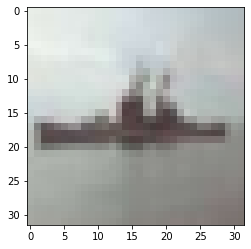

In [40]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])